In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [85]:
bike=pd.read_csv('bicycle.csv', index_col='Date', parse_dates=True)

In [86]:
bike.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [87]:
#bike.index=pd.to_datetime(bike.index, format='%Y-%m-%d %H:%M:%S')

In [88]:
bike.shape

(62040, 3)

In [89]:
bike.columns=['Total','East','West']

In [90]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62040 entries, 2012-10-03 00:00:00 to 2019-10-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   62030 non-null  float64
 1   East    62030 non-null  float64
 2   West    62030 non-null  float64
dtypes: float64(3)
memory usage: 1.9 MB


In [91]:
bike.describe()

,Total,East,West
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276
std,145.686289,67.739036,90.417584
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,74.000000
max,1097.000000,698.000000,850.000000


In [92]:
bike.isna().sum()

Total    10
East     10
West     10
dtype: int64

In [93]:
#Since there are only 10 such nan rows, we can drop these.
bike.dropna(inplace=True)

In [94]:
#Lets convert the columns type from float to int 
#bike[['Total','East','West']]=bike[['Total','East','West']].astype(int)
bike=bike.astype(int)

In [95]:
bike_2=bike.copy()
bike_2.drop(columns=['Total'], inplace=True)

In [96]:
bike_2.head()

,East,West
Date,,
2012-10-03 00:00:00,4,9
2012-10-03 01:00:00,4,6
2012-10-03 02:00:00,1,1
2012-10-03 03:00:00,2,3
2012-10-03 04:00:00,6,1


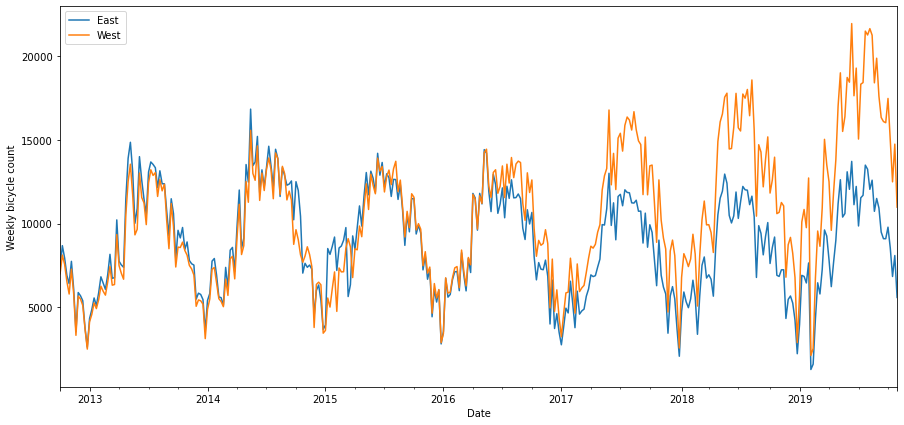

In [97]:
#Plotting graphs:
plt.rcParams["figure.figsize"] = (15,7)
weekly=bike_2.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bicycle count')
plt.show()

It can be seen that during the period of 2017 to 2019 the bicycle count for West pathway is higher than East pathway. We can partially conclude that during this period, the bicycle riders travelling through West pathway has increased. 

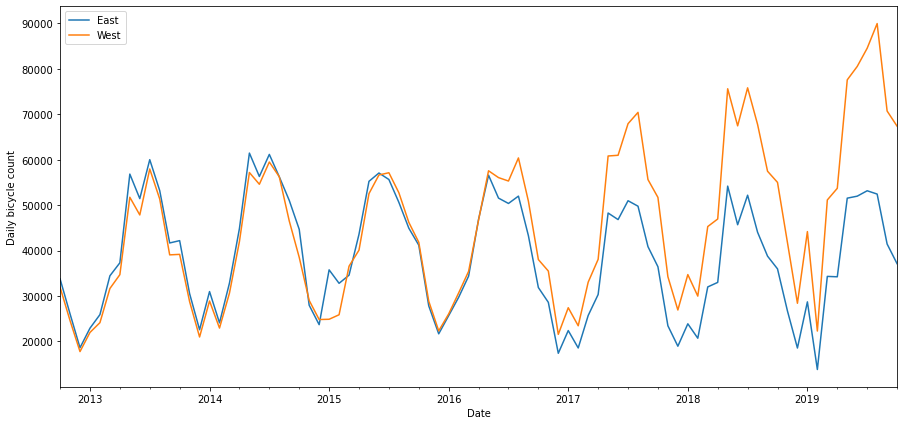

In [98]:
daily = bike_2.resample('M').sum()
daily.plot()
plt.ylabel('Daily bicycle count')
plt.show()

In [99]:
import datetime 
bike_2['year']=pd.DatetimeIndex(bike_2.index).year
bike_2['month']=pd.DatetimeIndex(bike_2.index).month
bike_2['hour']=pd.DatetimeIndex(bike_2.index).hour
bike_2['day']=pd.DatetimeIndex(bike_2.index).day
    #i['month']=i.index.month
    #i['hour']=i.index.hour
    #i['day']=i.index.day

In [100]:
bike_2['day_of_week']=pd.DatetimeIndex(bike_2.index).dayofweek

In [101]:
bike_2.head()

,East,West,year,month,hour,day,day_of_week
Date,,,,,,,
2012-10-03 00:00:00,4,9,2012,10,0,3,2
2012-10-03 01:00:00,4,6,2012,10,1,3,2
2012-10-03 02:00:00,1,1,2012,10,2,3,2
2012-10-03 03:00:00,2,3,2012,10,3,3,2
2012-10-03 04:00:00,6,1,2012,10,4,3,2


## Exploratory Data Analysis

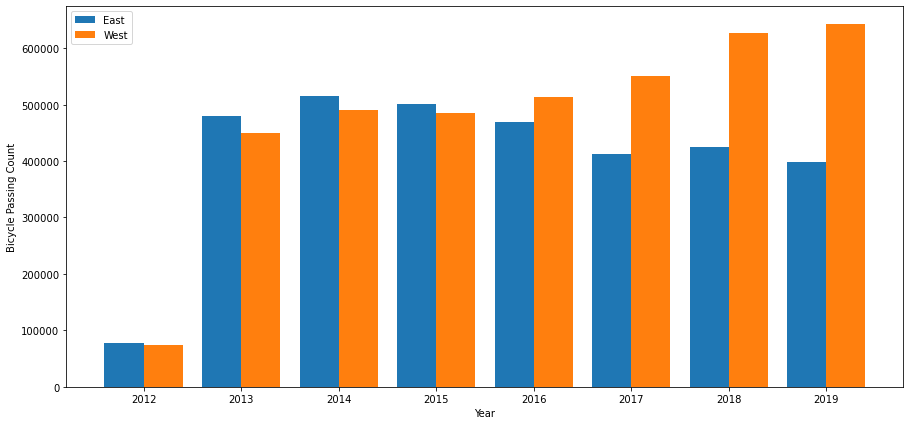

In [102]:
w=0.4
x=bike_2.year.unique()

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
               
y1=bike_2['East'].resample('Y').sum()
y2=bike_2['West'].resample('Y').sum()
               
plt.bar(bar1, y1, w, label='East')
plt.bar(bar2, y2, w, label='West')

plt.xlabel('Year')
plt.ylabel('Bicycle Passing Count')
plt.xticks(bar1+w/2, x)
plt.legend()
plt.show()

- We can observe an **exponential change** in the bicycle ridership count from **2012 to 2013**. Using this, we can make a conclusion that from 2013 most of the people have started to use bicycles.
- It can clearly be observed that bicycle passing on the **West pathway has been increasing** each year while for **East pathway, the count has been declining since 2014**.

In [103]:
East=bike_2.groupby('month')['East'].sum()

In [104]:
West=bike_2.groupby('month')['West'].sum()

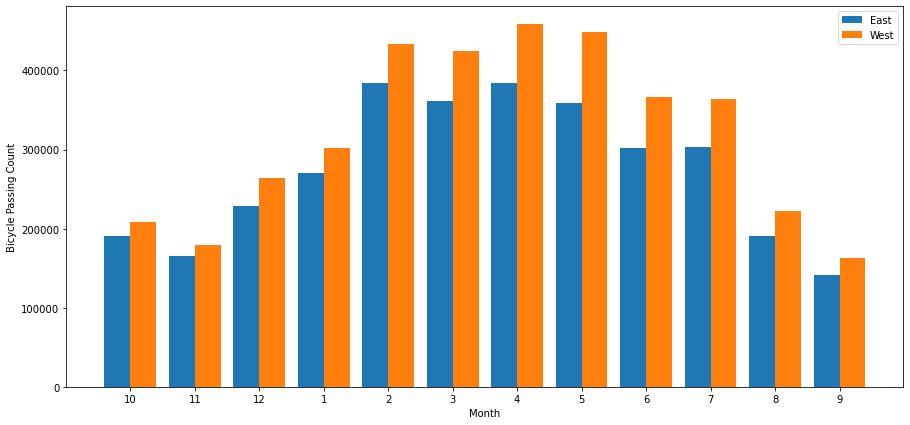

In [105]:
w=0.4
x=bike_2.month.unique()
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, East, w, label='East')
plt.bar(bar2, West, w, label='West')

plt.xlabel('Month')
plt.ylabel('Bicycle Passing Count')
plt.xticks(bar1+w/2, x)
plt.legend()
plt.show()

The traffic can be observed significantly **high** from **Febrauary to May** and **least** in the months of **September and November**. <br> 
We can infer a seasonal trend using this insight:  
   - During the **late Winters, Spring and Summers**, the count is **high**.
   - During the **Autumns and early Winters**, the bicycle ridership count is **low**.

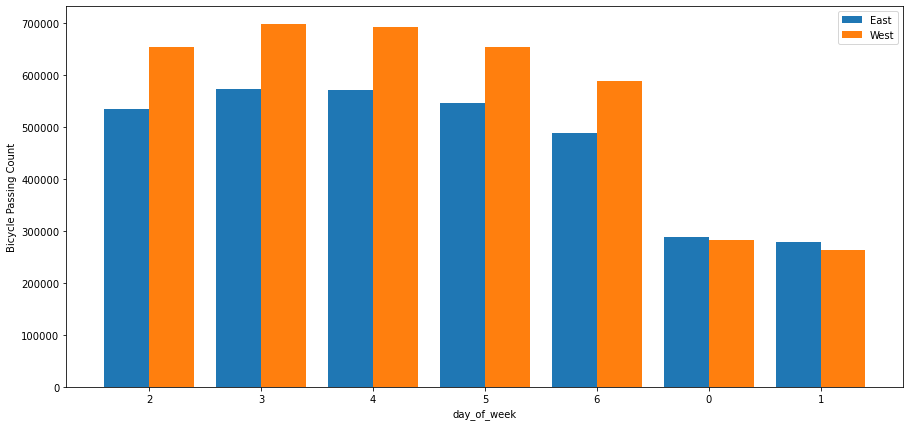

In [106]:
East=bike_2.groupby('day_of_week')['East'].sum()
West=bike_2.groupby('day_of_week')['West'].sum()

w=0.4
x=bike_2.day_of_week.unique()
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, East, w, label='East')
plt.bar(bar2, West, w, label='West')

plt.xlabel('day_of_week')
plt.ylabel('Bicycle Passing Count')
plt.xticks(bar1+w/2, x)
plt.legend()
plt.show()

**Note**: the week starts from Monday having index value as 0.<br><br>
The traffic can be observed **high** from **Wednesday to Sunday**, while the **lowest** for **Monday and Tuesday**. 

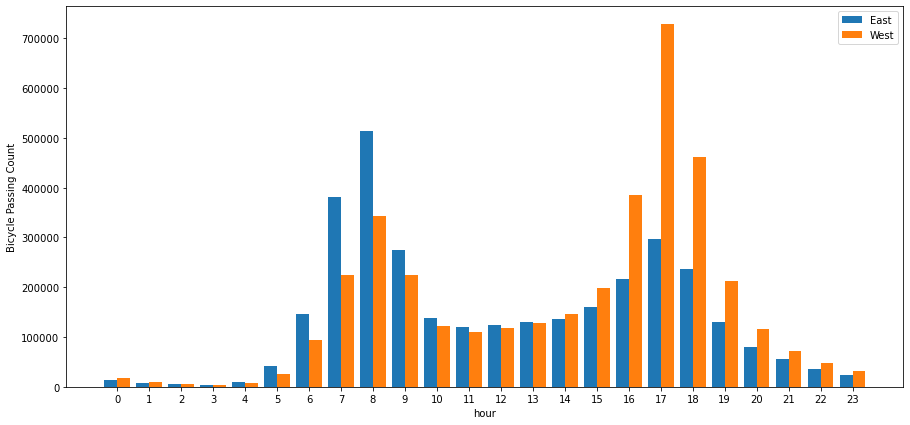

In [107]:
East=bike_2.groupby('hour')['East'].sum()
West=bike_2.groupby('hour')['West'].sum()

w=0.4
x=bike_2.hour.unique()
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, East, w, label='East')
plt.bar(bar2, West, w, label='West')

plt.xlabel('hour')
plt.ylabel('Bicycle Passing Count')
plt.xticks(bar1+w/2, x)
plt.legend()
plt.show()

- We can see that the bicycle ridership count starts to **increase from 7:00 AM till 9:00 AM**, indicating this is the time during when most people leave for their work or school.<br>
- The **second rise** can be observed from **4:00 PM to 6:00 PM**, indicating the time people leave for their home back from school or workplace.<br><br>

**PEAK HOURS**: The peak hour using the **East** pathway is **9:00 AM** and for **West** pathway it is **6:00 PM**. From this information, we can make a conclusion that most of the riders leaving for their work use the East pathway and while returning home they use the West pathway.

## Checking Stationarity of the Dataset

### 1. By observing the graph

<AxesSubplot:xlabel='Date'>

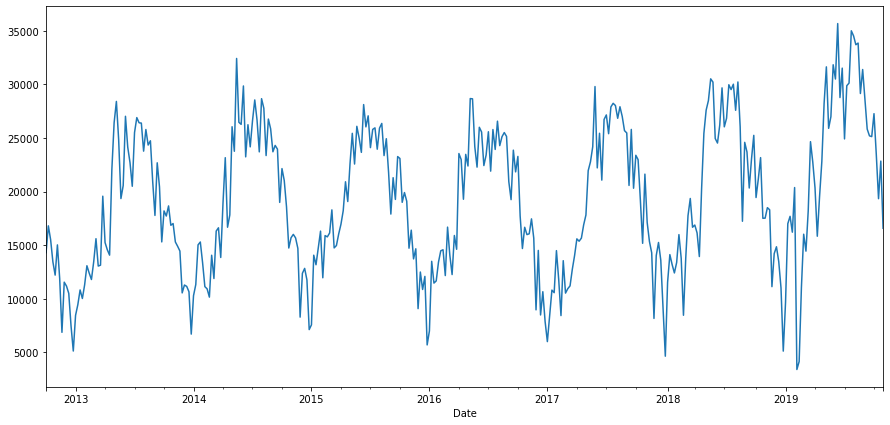

In [108]:
#Considering the Total Count
bike['Total'].resample('W').sum().plot()

Just by looking at it, we can say it is a stationary series with negligible trend. But there can be some kind of seasonality in the set.

### 2. Augmented Dickey-Fuller Test

In [109]:

#Perform ADF test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(bike['Total'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -21.871415
p-value                            0.000000
#Lags Used                        60.000000
Number of Observations Used    61969.000000
Critical Value (1%)               -3.430456
Critical Value (5%)               -2.861587
Critical Value (10%)              -2.566795
dtype: float64


Our p-value is definitely less than 0.5, almost 0 so we can say with pretty good confidence that we can reject the null (unit root, non-stationary data) and can assume our data is stationary. Additionally, our ADF Test Statistic is much less than our 1% confidence value of -3.43, so we have another confirmation that we can reject the null hypothesis.<br><br>

Now that we know its stationary, we need to see if its correlated (remember there’s an assumption of dependance / correlation for autoregression). Let’s look at a lagplot.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

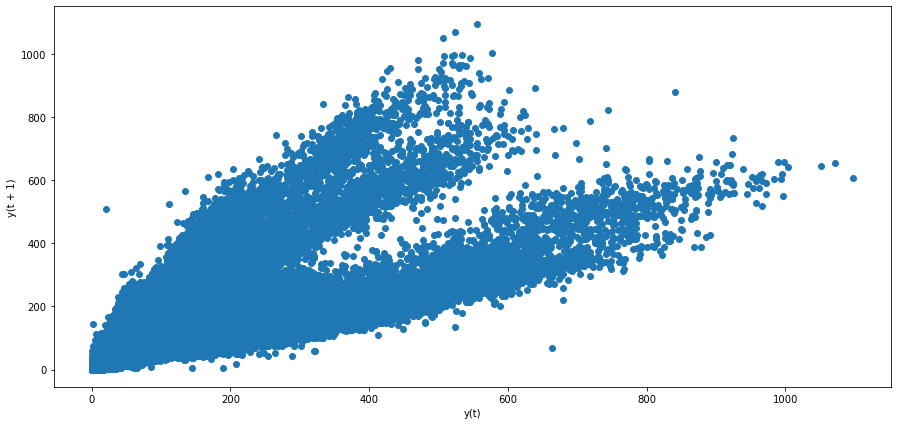

In [110]:
from pandas.plotting import lag_plot
lag_plot(bike['Total'], lag=1)

This showcases a positive correlation relationship. Lets start with modelling it.

In [111]:
bike.drop(columns=['East','West'], inplace=True)

In [112]:
bike=bike.resample('D').mean()

In [113]:
bike.shape

(2585, 1)

### Train-Test Data Splitting

In [114]:
# Train-Test Split in the ratio 80:20

train=bike[:2068]
test=bike[2068:]
train.tail(), test.head()

(                 Total
 Date                  
 2018-05-28  101.000000
 2018-05-29  185.333333
 2018-05-30  211.541667
 2018-05-31  190.833333
 2018-06-01  173.625000,
                  Total
 Date                  
 2018-06-02  121.291667
 2018-06-03   56.000000
 2018-06-04  159.041667
 2018-06-05  209.291667
 2018-06-06  217.500000)

### Model Building

<AxesSubplot:title={'center':'Daily Ridership'}, xlabel='Date'>

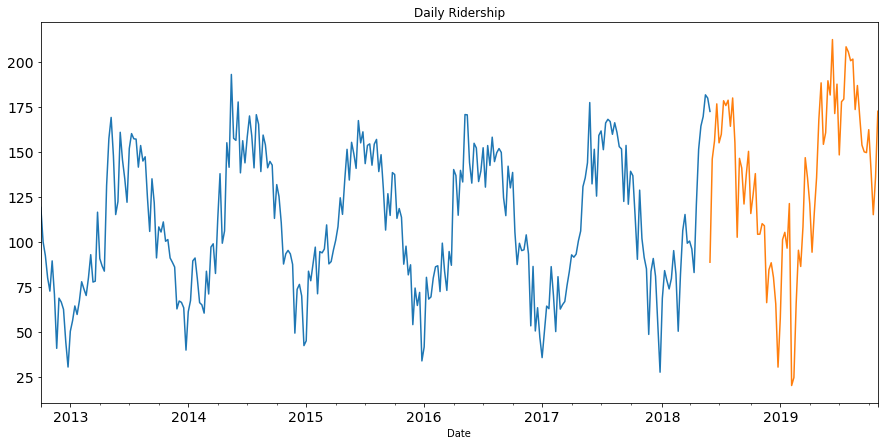

In [115]:
#Plotting data

train.Total.resample('W').mean().plot(title= 'Daily Ridership', fontsize=14)
test.Total.resample('W').mean().plot(title= 'Daily Ridership', fontsize=14)

### 1. Baseline Model
Assume previous value as the next predicted value

Text(0.5, 1.0, 'Baseline Forecast')

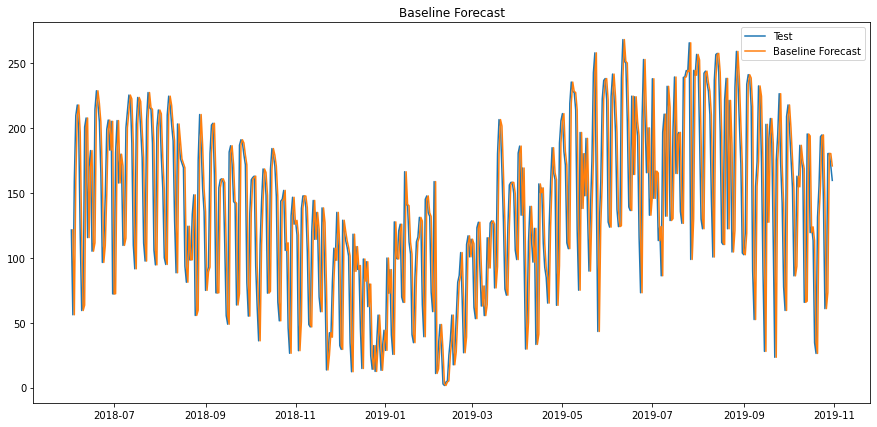

In [116]:
baseline = test.Total.shift(1)
#plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(baseline, label='Baseline Forecast')
plt.legend(loc='best')
plt.title("Baseline Forecast")

In [117]:
baseline.fillna(baseline.median(), inplace=True)

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, baseline))
rmse

52.74955660894734

### 2. Auto Regression (AR) Model

In [119]:
from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import r2_score

#train the autoregression model
model = AR(train)
model_fitted = model.fit()

print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 26


In [120]:
#make predictions 
predictions = model_fitted.predict(start=len(train), end=len(train) + len(test)-1, dynamic=False)


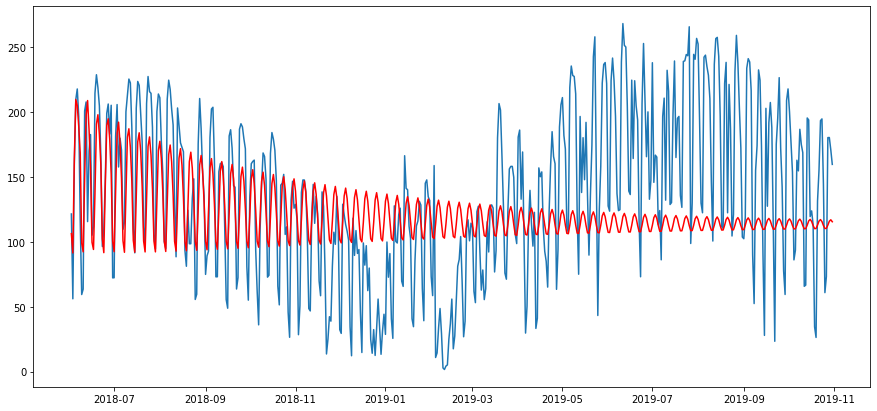

In [121]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [122]:
rmse = sqrt(mean_squared_error(test, predictions))
rmse

60.03838191077991

### 3. Moving Average (MA) Model

- #### Using Rolling Mean Window on whole dataset

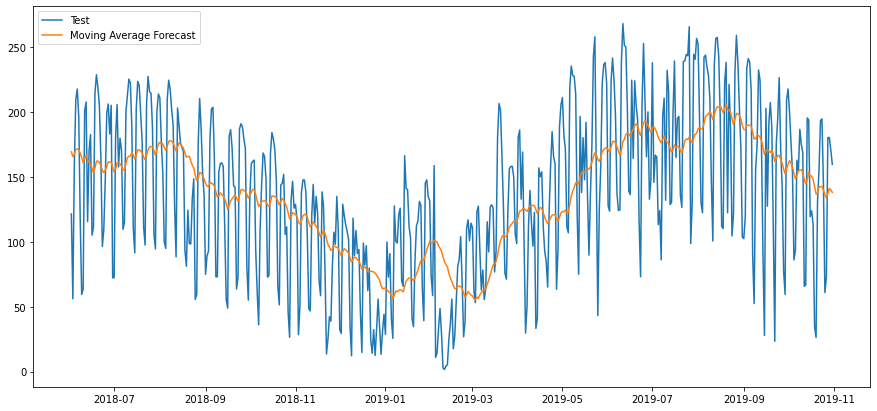

In [123]:

mov_avg = bike['Total'].rolling(window=30).mean()
#plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(mov_avg[2068:], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [124]:
prediction=mov_avg[2068:]

In [125]:
rmse = sqrt(mean_squared_error(test, prediction))
rmse

50.23352816336994

- #### Using ARIMA Model in order(0,0,1) for MA

2018-06-02    126.483510
2018-06-03    109.222929
2018-06-04    109.222929
2018-06-05    109.222929
2018-06-06    109.222929
                 ...    
2019-10-27    109.222929
2019-10-28    109.222929
2019-10-29    109.222929
2019-10-30    109.222929
2019-10-31    109.222929
Freq: D, Name: predicted_mean, Length: 517, dtype: float64


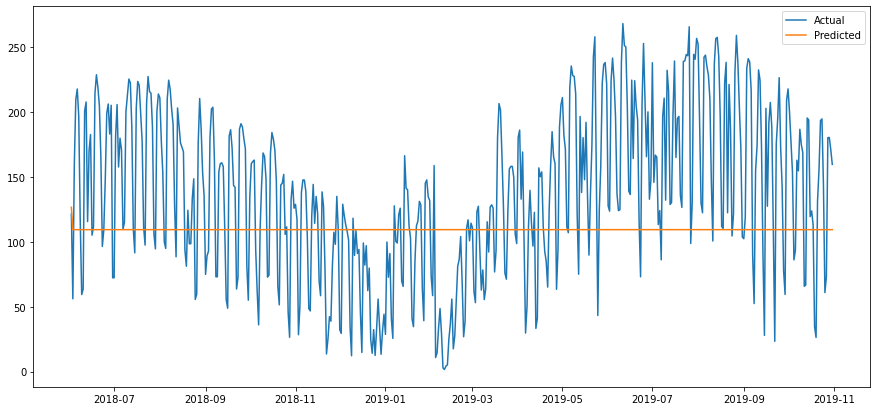

In [126]:

# MA 
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train, order=(0, 0, 1))
model_fit = model.fit()

# make prediction
prediction = model_fit.predict(start='2018-06-02', end='2019-10-31')
print(prediction)

plt.plot(test['Total'], label='Actual')
plt.plot(prediction, label='Predicted')

plt.legend(loc='best')
plt.show()

In [127]:
rmse = sqrt(mean_squared_error(test, prediction))
rmse

69.22345142472325

### 4. Using ARIMA Model: Autoregressive(p) Integrated(d) Moving Average(q)

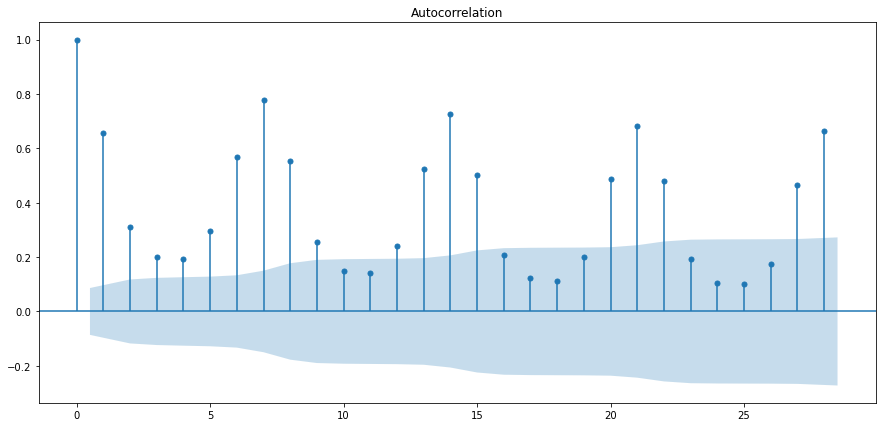

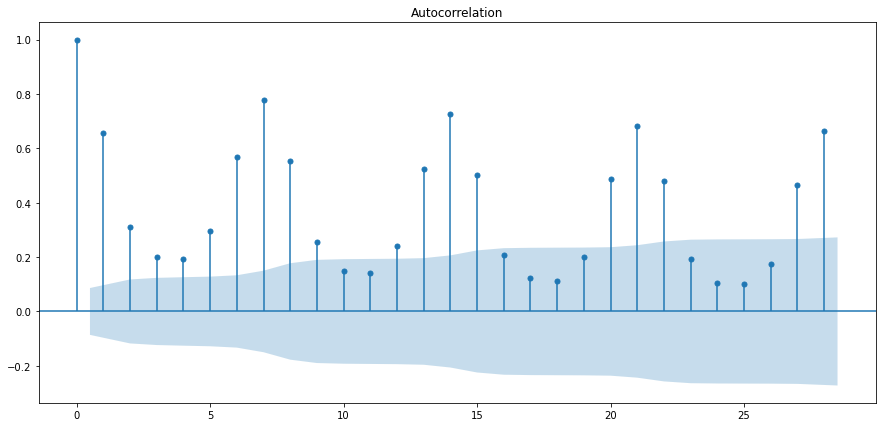

In [128]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#plot acf to identify parameter Q
plot_acf(test)

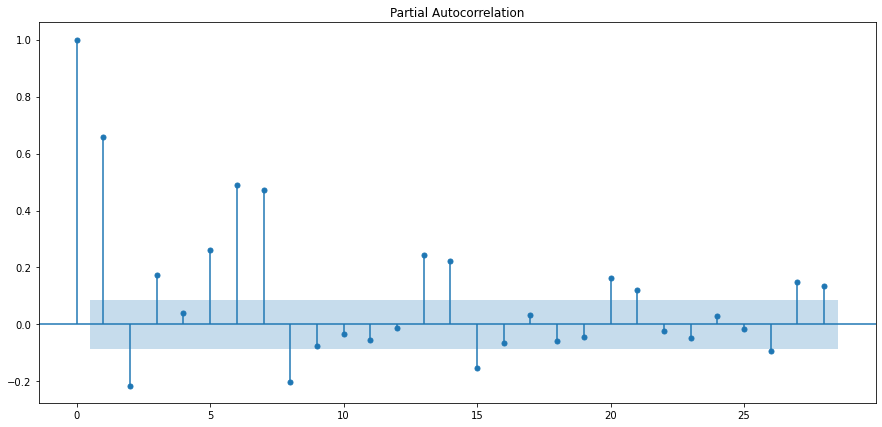

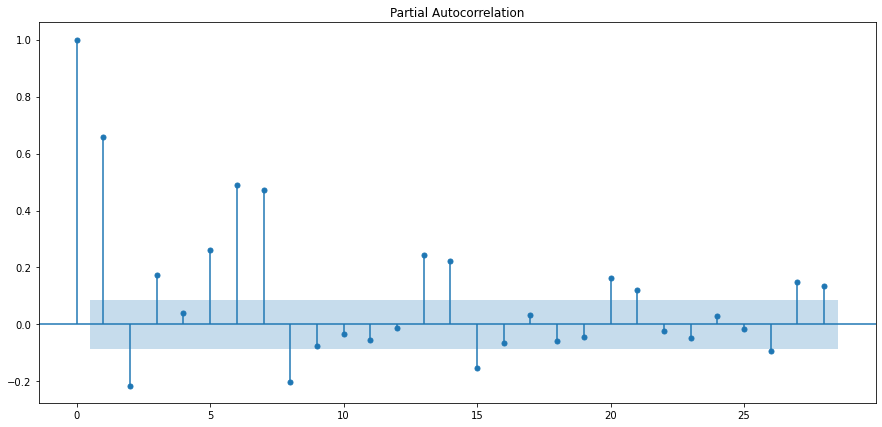

In [129]:
#plot acf to identify parameter P
plot_pacf(test)

In [130]:

# for p in range(3,5):
#     for d in range(0,2):
#         for q in range(3,11):
#             order = (p,d,q)
#             model = ARIMA(train, order=order)
#             model_fit = model.fit()

#             # make prediction
#             prediction = model_fit.predict(start='2018-06-02', end='2019-10-31')
#             rmse = sqrt(mean_squared_error(test, prediction))
#             print('ARIMA%s RMSE=%.3f' % (order,rmse))



2018-06-02    109.393264
2018-06-03    110.394805
2018-06-04    176.513179
2018-06-05    210.044811
2018-06-06    198.257988
                 ...    
2019-10-27    118.513798
2019-10-28    162.528528
2019-10-29    197.628447
2019-10-30    208.089504
2019-10-31    198.752342
Freq: D, Name: predicted_mean, Length: 517, dtype: float64


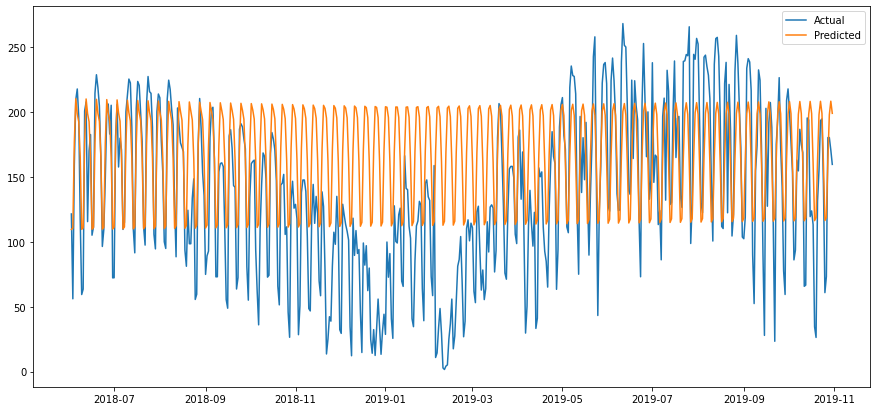

In [131]:
# fit model
model = ARIMA(train, order=(4, 1, 5))
model_fit = model.fit()

# make prediction
prediction = model_fit.predict(start='2018-06-02', end='2019-10-31')
print(prediction)

plt.plot(test['Total'], label='Actual')
plt.plot(prediction, label='Predicted')

plt.legend(loc='best')
plt.show()

In [132]:
rmse = sqrt(mean_squared_error(test, prediction))
rmse

59.551575007460805

## Conclusion:<br><br>


|Model|RMSE|
|-----|----|
|Baseline|52.75|
|Auto Regression AR()|60.03|
|Rolling Window Mean|50.23|
|Moving Average MA()|69.22|
|ARIMA|59.55|<br>


The **Rolling Mean Window** Model performed best out of all the proposed models for the given dataset.